In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from matplotlib import colors 
from matplotlib.ticker import PercentFormatter 
from IPython.display import display
import scipy.stats as scs
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score 
from sklearn.metrics import confusion_matrix, precision_score, classification_report, roc_curve, auc
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import prince as prince

import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_palette(palette='muted', n_colors=None, desat=None)##adjusting our color scheme
from datetime import datetime

In [2]:
Mitigation=pd.read_csv("C:/Users/ellen/Documents/Josh WGU material/C772 Capstone/Covid Death Potential Prjct/1StateOxfordUniversityDataCleanedContVariables.csv",encoding='latin1') ##importing raw data
Casedeaths=pd.read_csv("C:/Users/ellen/Documents/Josh WGU material/C772 Capstone/Covid Death Potential Prjct/2HealthcareGovCovidCasesDeath2.csv") ##importing raw data
Popdemo=pd.read_csv("C:/Users/ellen/Documents/Josh WGU material/C772 Capstone/Covid Death Potential Prjct/3CensusPopDemoCleanedDistFromMeanPopDensity.csv") ##importing raw data
Unemployment=pd.read_csv("C:/Users/ellen/Documents/Josh WGU material/C772 Capstone/Covid Death Potential Prjct/4BLSUnemploymentRate.csv") ##importing raw data
Popdensity=pd.read_csv("C:/Users/ellen/Documents/Josh WGU material/C772 Capstone/Covid Death Potential Prjct/5PopDensityPopReview.csv") ##importing raw data

In [3]:
Mitigation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11289 entries, 0 to 11288
Data columns (total 64 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CountryName                            11289 non-null  object 
 1   CountryCode                            11289 non-null  object 
 2   RegionName                             11289 non-null  object 
 3   RegionCode                             11289 non-null  object 
 4   Date                                   11289 non-null  int64  
 5   C1_School closing                      10855 non-null  float64
 6   C1_Flag                                7624 non-null   float64
 7   C1_Notes                               330 non-null    object 
 8   C2_Workplace closing                   10855 non-null  float64
 9   C2_Flag                                7608 non-null   float64
 10  C2_Notes                               546 non-null    object 
 11  C3

In [4]:
Casedeaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10410 entries, 0 to 10409
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   submission_date  10410 non-null  object 
 1   state            10410 non-null  object 
 2   tot_cases        10410 non-null  int64  
 3   conf_cases       2828 non-null   float64
 4   prob_cases       2828 non-null   float64
 5   new_case         10410 non-null  int64  
 6   pnew_case        5613 non-null   float64
 7   tot_death        10410 non-null  int64  
 8   conf_death       3034 non-null   float64
 9   prob_death       3034 non-null   float64
 10  new_death        10410 non-null  int64  
 11  pnew_death       5526 non-null   float64
 12  created_at       10410 non-null  object 
 13  consent_cases    8412 non-null   object 
 14  consent_deaths   8604 non-null   object 
dtypes: float64(6), int64(4), object(5)
memory usage: 1016.7+ KB


In [5]:
Popdemo.head(50)

,RegionName,Asian,Black,Hispanic,Native_American,Pacific_Islander,White,Female,MedianAge,TotalPopulation
0,Alabama,-30348.481700,140306.424300,-73034.774160,-10136.356430,-4657.482051,-22129.330010,10009.105770,38.9,4995720
1,Alaska,2.636743,-7.501011,-4.924204,15.324159,1.163128,-6.698814,-2.625619,34.0,791763
2,Arizona,-58.453841,-433.252770,1251.176796,139.117028,-16.302629,-882.284591,-18.827291,37.4,7511073
3,Arkansas,-178.212434,233.955218,-261.046203,-36.035842,-10.977061,252.316327,17.241919,37.9,3088059
4,California,2767.960561,-1445.045540,6811.315684,-333.104187,11.609120,-7812.735613,-79.598292,36.3,41244250
5,Colorado,-47.766665,-394.312757,535.263820,-54.717417,-18.102794,-20.364187,-53.884607,36.6,5955994
6,Connecticut,201.930974,-579.805005,3493.622125,-1188.049823,-359.479162,-1568.219189,447.772150,40.8,3661327
7,Delaware,-260.800527,5587.685037,-1343.808602,-700.378272,-245.872305,-3036.825335,532.508898,40.2,1002649
8,Florida,-669.903085,1728.532268,5706.678968,-669.948171,-171.183764,-5924.176178,214.813257,41.9,21995082
9,Georgia,-50.633815,3770.108376,-449.288109,-289.359093,-85.907347,-2894.920014,151.455690,36.5,10874206


In [6]:
Unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Month                  306 non-null    int64  
 1   STATE                  306 non-null    int64  
 2   NAME                   306 non-null    object 
 3   UnemploymentRate       306 non-null    float64
 4   UnemploymentChangeMOM  306 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 10.8+ KB


In [7]:
Popdensity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   State                   50 non-null     object
 1   PopulationDensityMile2  50 non-null     object
dtypes: object(2)
memory usage: 464.0+ bytes


In [8]:
df=pd.DataFrame(Mitigation[['RegionCode','RegionName', 'Date', 'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events', 'C4_Restrictions on gatherings', 'C5_Close public transport', 'C6_Stay at home requirements', 'C7_Restrictions on internal movement', 'C8_International travel controls', 'E1_Income support', 'E2_Debt/contract relief', 'E3_Fiscal measures', 'E4_International support', 'H1_Public information campaigns', 'H2_Testing policy', 'H3_Contact tracing', 'H4_Emergency investment in healthcare', 'H5_Investment in vaccines', 'StringencyIndexForDisplay','GovernmentResponseIndexForDisplay', 'ContainmentHealthIndexForDisplay', 'EconomicSupportIndexForDisplay']])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11289 entries, 0 to 11288
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   RegionCode                             11289 non-null  object 
 1   RegionName                             11289 non-null  object 
 2   Date                                   11289 non-null  int64  
 3   C1_School closing                      10855 non-null  float64
 4   C2_Workplace closing                   10855 non-null  float64
 5   C3_Cancel public events                10855 non-null  float64
 6   C4_Restrictions on gatherings          10855 non-null  float64
 7   C5_Close public transport              10855 non-null  float64
 8   C6_Stay at home requirements           10855 non-null  float64
 9   C7_Restrictions on internal movement   10855 non-null  float64
 10  C8_International travel controls       10855 non-null  float64
 11  E1

In [9]:
##Renaming Columns to make them 
df=df.rename(columns={"C1_School closing":"C1_Schoolclosing","C2_Workplace closing":"C2_Workplaceclosing","C3_Cancel public events":"C3_Cancelpublicevents","C4_Restrictions on gatherings":"C4_Restrictionsongatherings","C5_Close public transport":"C5_Closepublictransport","C6_Stay at home requirements":"C6_Stayathomerequirements","C7_Restrictions on internal movement":"C7_Restrictionsoninternalmovement","C8_International travel controls":"C8_Internationaltravelcontrols","E1_Income support":"E1_Incomesupport","E2_Debt/contract relief":"E2_Debt/contractrelief","E3_Fiscal measures":"E3_Fiscalmeasures","E4_International support":"E4_Internationalsupport","H1_Public information campaigns":"H1_Publicinformationcampaigns","H2_Testing policy":"H2_Testingpolicy","H3_Contact tracing":"H3_Contacttracing","H4_Emergency investment in healthcare":"H4_Emergencyinvestmentinhealthcare","H5_Investment in vaccines":"H5_Investmentinvaccines"
})

In [10]:
##It appears we have some missing  data in C4 and C5 columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11289 entries, 0 to 11288
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   RegionCode                          11289 non-null  object 
 1   RegionName                          11289 non-null  object 
 2   Date                                11289 non-null  int64  
 3   C1_Schoolclosing                    10855 non-null  float64
 4   C2_Workplaceclosing                 10855 non-null  float64
 5   C3_Cancelpublicevents               10855 non-null  float64
 6   C4_Restrictionsongatherings         10855 non-null  float64
 7   C5_Closepublictransport             10855 non-null  float64
 8   C6_Stayathomerequirements           10855 non-null  float64
 9   C7_Restrictionsoninternalmovement   10855 non-null  float64
 10  C8_Internationaltravelcontrols      10855 non-null  float64
 11  E1_Incomesupport                    10855

In [11]:
## We have some missing values within our ordinal data. It appears C4 and C5 have some nulls. We need to examine.
nulls=df.query('C4_Restrictionsongatherings.isnull()', engine='python')
nulls.head(20)

,RegionCode,RegionName,Date,C1_Schoolclosing,C2_Workplaceclosing,C3_Cancelpublicevents,C4_Restrictionsongatherings,C5_Closepublictransport,C6_Stayathomerequirements,C7_Restrictionsoninternalmovement,...,E4_Internationalsupport,H1_Publicinformationcampaigns,H2_Testingpolicy,H3_Contacttracing,H4_Emergencyinvestmentinhealthcare,H5_Investmentinvaccines,StringencyIndexForDisplay,GovernmentResponseIndexForDisplay,ContainmentHealthIndexForDisplay,EconomicSupportIndexForDisplay
9773,US_VI,Virgin Islands,20200101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0
9774,US_VI,Virgin Islands,20200102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0
9775,US_VI,Virgin Islands,20200103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0
9776,US_VI,Virgin Islands,20200104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0
9777,US_VI,Virgin Islands,20200105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0
9778,US_VI,Virgin Islands,20200106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0
9779,US_VI,Virgin Islands,20200107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0
9780,US_VI,Virgin Islands,20200108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0
9781,US_VI,Virgin Islands,20200109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0
9782,US_VI,Virgin Islands,20200110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0


In [12]:
##After examining our missing values, it is blank ordinal data that was blank instead of 0.
## We will be Replacing missing ordinal data with "0" instead of blank
## For the 3 of 4 'indexes' that are missin 36 of 9100 values, we will use Pandas 'bfill' option to use previous weeks' data to fill

df['C4_Restrictionsongatherings']=df['C4_Restrictionsongatherings'].fillna(0)
df['C5_Closepublictransport']=df['C5_Closepublictransport'].fillna(0)
df['E3_Fiscalmeasures']=df['E3_Fiscalmeasures'].fillna(0)
df['E4_Internationalsupport']=df['E4_Internationalsupport'].fillna(0)
df['H4_Emergencyinvestmentinhealthcare']=df['H4_Emergencyinvestmentinhealthcare'].fillna(0)
df['H5_Investmentinvaccines']=df['H5_Investmentinvaccines'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11289 entries, 0 to 11288
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   RegionCode                          11289 non-null  object 
 1   RegionName                          11289 non-null  object 
 2   Date                                11289 non-null  int64  
 3   C1_Schoolclosing                    10855 non-null  float64
 4   C2_Workplaceclosing                 10855 non-null  float64
 5   C3_Cancelpublicevents               10855 non-null  float64
 6   C4_Restrictionsongatherings         11289 non-null  float64
 7   C5_Closepublictransport             11289 non-null  float64
 8   C6_Stayathomerequirements           10855 non-null  float64
 9   C7_Restrictionsoninternalmovement   10855 non-null  float64
 10  C8_Internationaltravelcontrols      10855 non-null  float64
 11  E1_Incomesupport                    10855

In [13]:
##Finding Unique Values in DataSet
df.nunique()

RegionCode                             52
RegionName                             52
Date                                  218
C1_Schoolclosing                      103
C2_Workplaceclosing                   103
C3_Cancelpublicevents                 118
C4_Restrictionsongatherings            85
C5_Closepublictransport               101
C6_Stayathomerequirements              31
C7_Restrictionsoninternalmovement      81
C8_Internationaltravelcontrols         72
E1_Incomesupport                       60
E2_Debt/contractrelief                 60
E3_Fiscalmeasures                       1
E4_Internationalsupport                48
H1_Publicinformationcampaigns          75
H2_Testingpolicy                       75
H3_Contacttracing                      66
H4_Emergencyinvestmentinhealthcare      1
H5_Investmentinvaccines                 1
StringencyIndexForDisplay             122
GovernmentResponseIndexForDisplay     175
ContainmentHealthIndexForDisplay      144
EconomicSupportIndexForDisplay    

In [14]:
##After noticing few unique values in FiscalMeasures or Emergency Investmentinhealthcare, we are dropping those 3 variable due to lack of data
display(df['E3_Fiscalmeasures'].value_counts())
display(df['H4_Emergencyinvestmentinhealthcare'].value_counts())
display(df['H5_Investmentinvaccines'].value_counts())
df=df.drop(columns=['E3_Fiscalmeasures','H4_Emergencyinvestmentinhealthcare','H5_Investmentinvaccines'])

0    11289
Name: E3_Fiscalmeasures, dtype: int64

0    11289
Name: H4_Emergencyinvestmentinhealthcare, dtype: int64

0    11289
Name: H5_Investmentinvaccines, dtype: int64

In [15]:
##Converting Date in df to MM/DD/YYYY
df['Date']=pd.to_datetime(df['Date'], format='%Y%m%d').dt.strftime('%m/%d/%Y')

In [16]:
#Adding StateCode and Removing RegionCode to provide 2 letter state abbreviations for joining reference tables when neccessary
df['StateCode']=df.RegionCode.apply(lambda x: x[3:5])
df=df.drop(columns=['RegionCode'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11289 entries, 0 to 11288
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RegionName                         11289 non-null  object 
 1   Date                               11289 non-null  object 
 2   C1_Schoolclosing                   10855 non-null  float64
 3   C2_Workplaceclosing                10855 non-null  float64
 4   C3_Cancelpublicevents              10855 non-null  float64
 5   C4_Restrictionsongatherings        11289 non-null  float64
 6   C5_Closepublictransport            11289 non-null  float64
 7   C6_Stayathomerequirements          10855 non-null  float64
 8   C7_Restrictionsoninternalmovement  10855 non-null  float64
 9   C8_Internationaltravelcontrols     10855 non-null  float64
 10  E1_Incomesupport                   10855 non-null  float64
 11  E2_Debt/contractrelief             10855 non-null  flo

In [18]:
##truncating cases table to temp table with format changes
tempdf=pd.DataFrame(Casedeaths[['state','submission_date','new_case','new_death']])
tempdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10410 entries, 0 to 10409
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   state            10410 non-null  object
 1   submission_date  10410 non-null  object
 2   new_case         10410 non-null  int64 
 3   new_death        10410 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 244.0+ KB


In [19]:
##Creating Temp Date as string for combining with state
df['temp_date']=df['Date'].astype('str')
##tempdf['temp_date']=tempdf['submission_date'].astype('str')
df['temp_date'] =df['temp_date'].replace('/','',regex=True) 
tempdf['temp_date'] =tempdf['submission_date'].replace('/','',regex=True)
tempdf.to_excel('df1.xlsx')

In [20]:
##Combining State with Date to get lookup value for reference tables
df['state_date']=df['RegionName']+df['temp_date']
df['statecode_date']=df['StateCode']+df['temp_date']
tempdf['statecode_date']=tempdf['state']+tempdf['temp_date']
df.head()

,RegionName,Date,C1_Schoolclosing,C2_Workplaceclosing,C3_Cancelpublicevents,C4_Restrictionsongatherings,C5_Closepublictransport,C6_Stayathomerequirements,C7_Restrictionsoninternalmovement,C8_Internationaltravelcontrols,...,H2_Testingpolicy,H3_Contacttracing,StringencyIndexForDisplay,GovernmentResponseIndexForDisplay,ContainmentHealthIndexForDisplay,EconomicSupportIndexForDisplay,StateCode,temp_date,state_date,statecode_date
0,Alabama,01/01/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,AL,01012020,Alabama01012020,AL01012020
1,Alabama,01/02/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,AL,01022020,Alabama01022020,AL01022020
2,Alabama,01/03/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,AL,01032020,Alabama01032020,AL01032020
3,Alabama,01/04/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,AL,01042020,Alabama01042020,AL01042020
4,Alabama,01/05/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,AL,01052020,Alabama01052020,AL01052020


In [21]:
df=pd.merge(df,tempdf,on='statecode_date',how='left')
df.head(10)
#df.to_excel('df2.xlsx')

,RegionName,Date,C1_Schoolclosing,C2_Workplaceclosing,C3_Cancelpublicevents,C4_Restrictionsongatherings,C5_Closepublictransport,C6_Stayathomerequirements,C7_Restrictionsoninternalmovement,C8_Internationaltravelcontrols,...,EconomicSupportIndexForDisplay,StateCode,temp_date_x,state_date,statecode_date,state,submission_date,new_case,new_death,temp_date_y
0,Alabama,01/01/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,AL,01012020,Alabama01012020,AL01012020,NaN,NaN,NaN,NaN,NaN
1,Alabama,01/02/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,AL,01022020,Alabama01022020,AL01022020,NaN,NaN,NaN,NaN,NaN
2,Alabama,01/03/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,AL,01032020,Alabama01032020,AL01032020,NaN,NaN,NaN,NaN,NaN
3,Alabama,01/04/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,AL,01042020,Alabama01042020,AL01042020,NaN,NaN,NaN,NaN,NaN
4,Alabama,01/05/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,AL,01052020,Alabama01052020,AL01052020,NaN,NaN,NaN,NaN,NaN
5,Alabama,01/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,AL,01062020,Alabama01062020,AL01062020,NaN,NaN,NaN,NaN,NaN
6,Alabama,01/07/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,AL,01072020,Alabama01072020,AL01072020,NaN,NaN,NaN,NaN,NaN
7,Alabama,01/08/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,AL,01082020,Alabama01082020,AL01082020,NaN,NaN,NaN,NaN,NaN
8,Alabama,01/09/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,AL,01092020,Alabama01092020,AL01092020,NaN,NaN,NaN,NaN,NaN
9,Alabama,01/10/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,AL,01102020,Alabama01102020,AL01102020,NaN,NaN,NaN,NaN,NaN


In [22]:
df=df.drop(columns=["temp_date_x","submission_date","temp_date_y","state"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11289 entries, 0 to 11288
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RegionName                         11289 non-null  object 
 1   Date                               11289 non-null  object 
 2   C1_Schoolclosing                   10855 non-null  float64
 3   C2_Workplaceclosing                10855 non-null  float64
 4   C3_Cancelpublicevents              10855 non-null  float64
 5   C4_Restrictionsongatherings        11289 non-null  float64
 6   C5_Closepublictransport            11289 non-null  float64
 7   C6_Stayathomerequirements          10855 non-null  float64
 8   C7_Restrictionsoninternalmovement  10855 non-null  float64
 9   C8_Internationaltravelcontrols     10855 non-null  float64
 10  E1_Incomesupport                   10855 non-null  float64
 11  E2_Debt/contractrelief             10855 non-null  flo

In [23]:
df=pd.merge(df,Popdemo,on='RegionName',how='left')
#df=df.drop(columns=["Male"])##Dropping male because it's inverse of female

In [24]:
df=df.rename(columns={"RegionName": "State"})

In [25]:
df=pd.merge(df,Popdensity,on='State',how='left')

In [26]:
Unemployment['Month'] = Unemployment['Month'].apply(str)
Unemployment['StateMonth']=Unemployment['NAME']+Unemployment['Month']


In [27]:
df['Date']=df.Date.apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))


In [28]:
df['Month']=df.Date.apply(lambda x: x.month)

In [29]:
df['Month'] = df['Month'].apply(str)
df['StateMonth']=df['State']+df['Month']

In [30]:
df=pd.merge(df,Unemployment,on='StateMonth',how='left')
df.head()

,State,Date,C1_Schoolclosing,C2_Workplaceclosing,C3_Cancelpublicevents,C4_Restrictionsongatherings,C5_Closepublictransport,C6_Stayathomerequirements,C7_Restrictionsoninternalmovement,C8_Internationaltravelcontrols,...,MedianAge,TotalPopulation,PopulationDensityMile2,Month_x,StateMonth,Month_y,STATE,NAME,UnemploymentRate,UnemploymentChangeMOM
0,Alabama,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.9,4995720.0,97,1,Alabama1,NaN,NaN,NaN,NaN,NaN
1,Alabama,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.9,4995720.0,97,1,Alabama1,NaN,NaN,NaN,NaN,NaN
2,Alabama,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.9,4995720.0,97,1,Alabama1,NaN,NaN,NaN,NaN,NaN
3,Alabama,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.9,4995720.0,97,1,Alabama1,NaN,NaN,NaN,NaN,NaN
4,Alabama,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.9,4995720.0,97,1,Alabama1,NaN,NaN,NaN,NaN,NaN


In [31]:
df.to_csv('dfmerged.csv')

In [32]:
##Dropping Unneccessary Columns
df=df.drop(columns=['Month_x','Month_y','STATE','NAME'])

In [33]:
df.nunique()

State                                   52
Date                                   218
C1_Schoolclosing                       103
C2_Workplaceclosing                    103
C3_Cancelpublicevents                  118
C4_Restrictionsongatherings             85
C5_Closepublictransport                101
C6_Stayathomerequirements               31
C7_Restrictionsoninternalmovement       81
C8_Internationaltravelcontrols          72
E1_Incomesupport                        60
E2_Debt/contractrelief                  60
E4_Internationalsupport                 48
H1_Publicinformationcampaigns           75
H2_Testingpolicy                        75
H3_Contacttracing                       66
StringencyIndexForDisplay              122
GovernmentResponseIndexForDisplay      175
ContainmentHealthIndexForDisplay       144
EconomicSupportIndexForDisplay           9
StateCode                               52
state_date                           11289
statecode_date                       11289
new_case   

In [34]:
##checking how many nulls are in each column out of 11366 entries
print(len(df) - df.count())

State                                   0
Date                                    0
C1_Schoolclosing                      434
C2_Workplaceclosing                   434
C3_Cancelpublicevents                 434
C4_Restrictionsongatherings             0
C5_Closepublictransport                 0
C6_Stayathomerequirements             434
C7_Restrictionsoninternalmovement     434
C8_Internationaltravelcontrols        434
E1_Incomesupport                      434
E2_Debt/contractrelief                434
E4_Internationalsupport                 0
H1_Publicinformationcampaigns         434
H2_Testingpolicy                      434
H3_Contacttracing                     434
StringencyIndexForDisplay             164
GovernmentResponseIndexForDisplay     164
ContainmentHealthIndexForDisplay      164
EconomicSupportIndexForDisplay          0
StateCode                               0
state_date                              0
statecode_date                          0
new_case                          

In [35]:
df['new_case']=df['new_case'].fillna(0)
df['new_death']=df['new_death'].fillna(0)


df['NewCasePer100k']=df['new_case']/(df['TotalPopulation']/100000)
df['NewDeathPer100k']=df['new_death']/(df['TotalPopulation']/100000)

In [36]:
###It appears we are missing some data in January and August (unemployment rate) so we will reduce the study to Feb-July for 6 months of data
df = df[df.UnemploymentRate.notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9057 entries, 31 to 11283
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   State                              9057 non-null   object        
 1   Date                               9057 non-null   datetime64[ns]
 2   C1_Schoolclosing                   9057 non-null   float64       
 3   C2_Workplaceclosing                9057 non-null   float64       
 4   C3_Cancelpublicevents              9057 non-null   float64       
 5   C4_Restrictionsongatherings        9057 non-null   float64       
 6   C5_Closepublictransport            9057 non-null   float64       
 7   C6_Stayathomerequirements          9057 non-null   float64       
 8   C7_Restrictionsoninternalmovement  9057 non-null   float64       
 9   C8_Internationaltravelcontrols     9057 non-null   float64       
 10  E1_Incomesupport                  

In [37]:
##Reducing Size to 7000+ records to avoid too avoid undersampling
df['month']=pd.DatetimeIndex(df['Date']).month
df=df.query('month>2')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7607 entries, 60 to 11283
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   State                              7607 non-null   object        
 1   Date                               7607 non-null   datetime64[ns]
 2   C1_Schoolclosing                   7607 non-null   float64       
 3   C2_Workplaceclosing                7607 non-null   float64       
 4   C3_Cancelpublicevents              7607 non-null   float64       
 5   C4_Restrictionsongatherings        7607 non-null   float64       
 6   C5_Closepublictransport            7607 non-null   float64       
 7   C6_Stayathomerequirements          7607 non-null   float64       
 8   C7_Restrictionsoninternalmovement  7607 non-null   float64       
 9   C8_Internationaltravelcontrols     7607 non-null   float64       
 10  E1_Incomesupport                  

####Reviewing New Data, 7650 rows remain rep Feb-July and show 9100 state rows and 9100 reference table rows. 

In [38]:
#Converting PopulationDensity to float from object
df['PopulationDensityMile2']=df.PopulationDensityMile2.apply(lambda x: x.replace(',',''))
df['PopulationDensityMile2']=df.PopulationDensityMile2.apply(lambda x: float(x))

In [39]:
df['MedianAge']=df['MedianAge']*df['PopulationDensityMile2']

In [40]:
df.nunique()

State                                  50
Date                                  153
C1_Schoolclosing                      100
C2_Workplaceclosing                   100
C3_Cancelpublicevents                 118
C4_Restrictionsongatherings            85
C5_Closepublictransport               101
C6_Stayathomerequirements              31
C7_Restrictionsoninternalmovement      81
C8_Internationaltravelcontrols         72
E1_Incomesupport                       58
E2_Debt/contractrelief                 58
E4_Internationalsupport                47
H1_Publicinformationcampaigns          71
H2_Testingpolicy                       71
H3_Contacttracing                      65
StringencyIndexForDisplay             117
GovernmentResponseIndexForDisplay     164
ContainmentHealthIndexForDisplay      135
EconomicSupportIndexForDisplay          9
StateCode                              50
state_date                           7607
statecode_date                       7607
new_case                          

In [41]:
##Creating two lists of Columns and their unique values

columns = []
colvalues = []
for col in list(df):
    columns.append(col)
    colvalues.append(np.sort(df[col].unique()))

In [42]:
#Combining Column List and Unique Value list into Dataframe for Export
UniqueVals = pd.DataFrame(
    {'Columns': columns,
     'ColumnValues': colvalues,
    })


In [43]:
##Exporting Unique Values to Excel
UniqueVals.to_excel("UniqueColumnsCovid.xlsx") 

In [44]:
##Creating function for likertscale visuals
def nobinvisuals(variable):
    sns.scatterplot(data=df, x=variable, y="NewDeathPer100k",legend=False).set_title("Interaction of "+str(variable)+" and New Deaths")
#plt.gca().axes.get_xaxis().set_ticklabels([])
#plt.gca().axes.get_xaxis().set_ticks([])
#plt.gca().axes.set_ylim(0, 2)
#plt.xticks(np.arange(min(df['C1_Schoolclosing'].value_counts()))*1.1, max(df['C1_Schoolclosing'].value_counts())*1.1, 1))

    plt.tight_layout()

#df.plot(x=df.columns.values[:-1], y=["CCC" for _ in df.columns.values[:-1]], 
                            #kind="scatter", subplots=True, sharey=True)

In [78]:
##Creating function for quant variable visuals
def quantstatvisuals(variable):
    data=df[variable]
    fig = plt.figure(figsize=(10,20)) 
    fig_dims = (5, 2)

    plt.subplot2grid(fig_dims, (0, 0))
    sns.distplot(df[variable],rug=True,).set_title("Distribution of "+str(variable))

    plt.subplot2grid(fig_dims, (0, 1))
    sns.boxplot(data=df, x=pd.qcut(data,
                              q=bin_edges,
                              labels=bin_labels_5,duplicates='raise'), y="NewDeathPer100k").set_title("Box Plot of "+str(variable)+" by quartile and Deaths per 1000")
    plt.gca().axes.set_ylim(0, 4)

    plt.subplot2grid(fig_dims, (1, 0))
    sns.barplot(data=df,x=pd.qcut(data,
                              q=bin_edges,
                              labels=bin_labels_5,duplicates='raise'),y="NewDeathPer100k").set_title("Average Deaths per 1000 by "+str(variable)+ " quartile")


    plt.subplot2grid(fig_dims, (1,1))
    sns.scatterplot(data=df, x=variable, y="NewDeathPer100k",legend=False).set_title("Interaction of "+str(variable)+" and New Deaths")
    plt.gca().axes.set_ylim(0, 4)
#plt.gca().axes.get_xaxis().set_ticklabels([])
#plt.gca().axes.get_xaxis().set_ticks([])
#plt.gca().axes.set_ylim(0, 2)
#plt.xticks(np.arange(min(df['C1_Schoolclosing'].value_counts()))*1.1, max(df['C1_Schoolclosing'].value_counts())*1.1, 1))

    plt.tight_layout()

#df.plot(x=df.columns.values[:-1], y=["CCC" for _ in df.columns.values[:-1]], 
                            #kind="scatter", subplots=True, sharey=True)

In [46]:
df.to_excel('df.xlsx')

Text(0.5, 1.0, 'Interaction of Stay at Home Requirements and New Deaths')

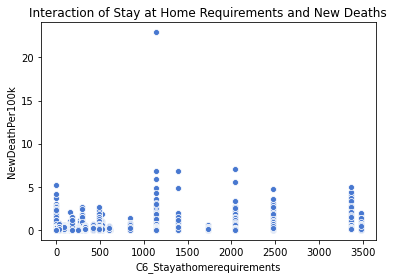

In [47]:
sns.scatterplot(data=df, x="C6_Stayathomerequirements", y="NewDeathPer100k",legend=False).set_title("Interaction of Stay at Home Requirements"+" and New Deaths")

In [48]:
df['C6_Stayathomerequirements'].describe()

count    7607.000000
mean      287.532980
std       680.579540
min         0.000000
25%         0.000000
50%         0.000000
75%       177.387329
max      3475.682981
Name: C6_Stayathomerequirements, dtype: float64

In [49]:
##binning the different death rates into 1-4 quartile for visualization and descriptive stats
bin_labels_5 = ['Low', 'Medium', 'High']


df['DeathBin'] = pd.qcut(df['NewDeathPer100k'],
                              q=[0, .25, .5, .75,1],
                              labels=bin_labels_5,duplicates='drop')
results, bin_edges = pd.qcut(df['NewDeathPer100k'],
                            q=[0, .25, .5, .75,1],
                            labels=bin_labels_5,
                            retbins=True,duplicates='drop')

results_table = pd.DataFrame(zip(bin_edges, bin_labels_5),
                            columns=['Threshold', 'Tier'])
df.to_excel('dfwithbins.xlsx')

DeathBin,Low,Medium,High
C1_Schoolclosing,,,
Low,0.32549,0.10254,0.07664
High,0.17629,0.14592,0.17313


DeathBin,Low,Medium,High
C2_Workplaceclosing,,,
Low,0.32549,0.10254,0.07664
High,0.17629,0.14592,0.17313


DeathBin,Low,Medium,High
C3_Cancelpublicevents,,,
Low,0.33469,0.10267,0.07204
High,0.16708,0.14579,0.17773


DeathBin,Low,Medium,High
C4_Restrictionsongatherings,,,
Low,0.33114,0.10490,0.07717
High,0.17063,0.14355,0.17260


DeathBin,Low,Medium,High
C5_Closepublictransport,,,
Low,0.32602,0.09794,0.07795
High,0.17576,0.15052,0.17182


DeathBin,Low,Medium,High
C7_Restrictionsoninternalmovement,,,
Low,0.34915,0.09728,0.06967
High,0.15262,0.15118,0.18010


DeathBin,Low,Medium,High
C8_Internationaltravelcontrols,,,
Low,0.32628,0.09978,0.08466
High,0.17550,0.14868,0.16511


DeathBin,Low,Medium,High
E1_Incomesupport,,,
Low,0.34744,0.09189,0.06954
High,0.15433,0.15657,0.18023


DeathBin,Low,Medium,High
E2_Debt/contractrelief,,,
Low,0.34744,0.09189,0.06954
High,0.15433,0.15657,0.18023


DeathBin,Low,Medium,High
E4_Internationalsupport,,,
Low,0.30906,0.11595,0.09452
High,0.19272,0.13251,0.15525


DeathBin,Low,Medium,High
H1_Publicinformationcampaigns,,,
Low,0.31655,0.10438,0.07953
High,0.18522,0.14408,0.17024


DeathBin,Low,Medium,High
H2_Testingpolicy,,,
Low,0.31655,0.10438,0.07953
High,0.18522,0.14408,0.17024


DeathBin,Low,Medium,High
H3_Contacttracing,,,
Low,0.30853,0.11779,0.08374
High,0.19324,0.13067,0.16603


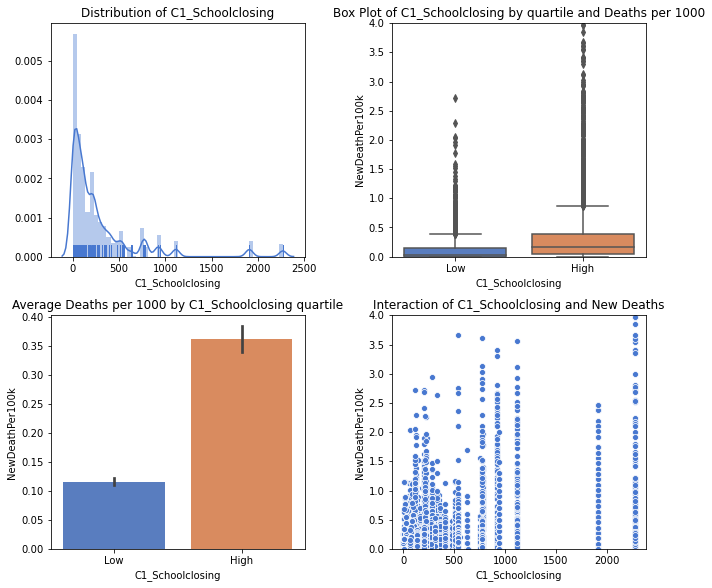

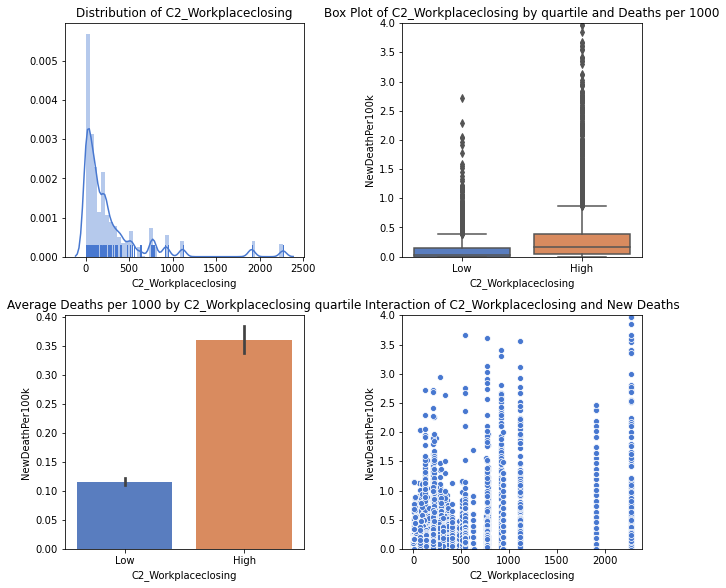

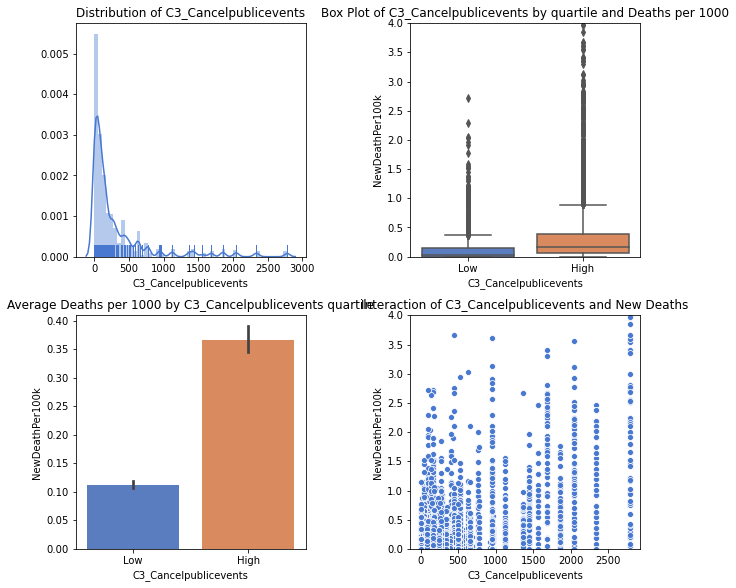

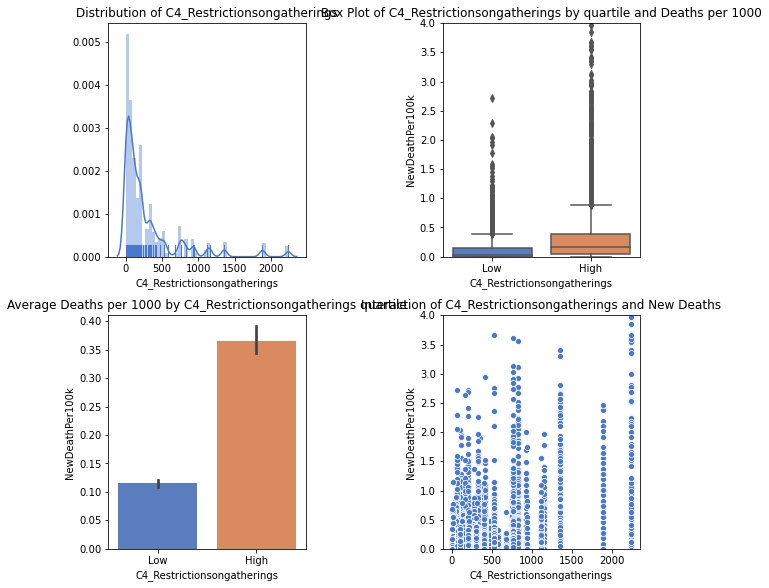

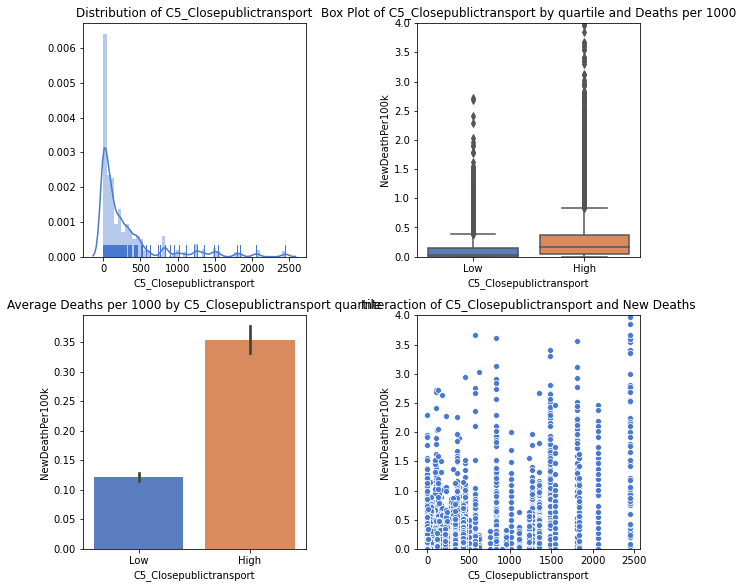

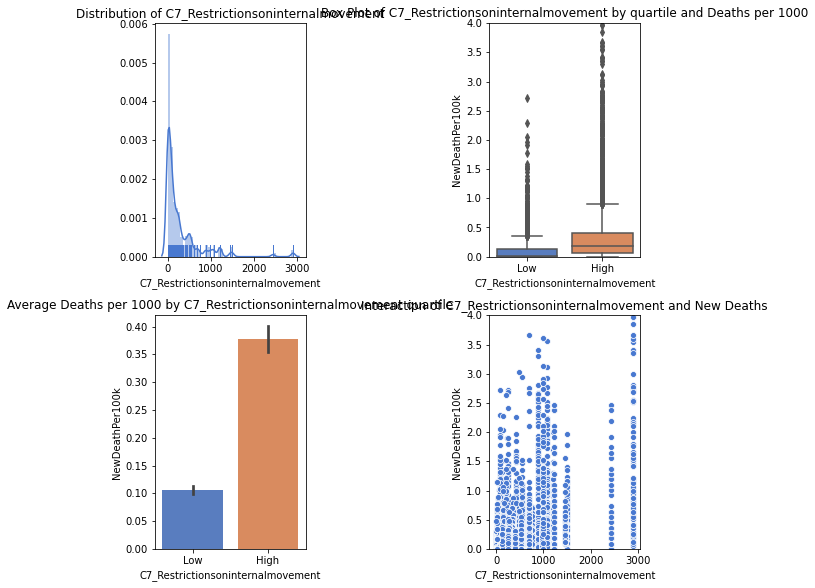

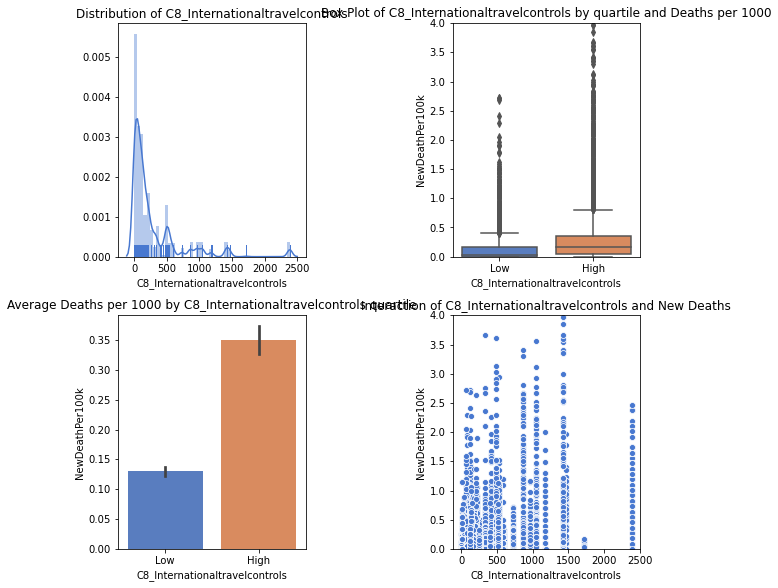

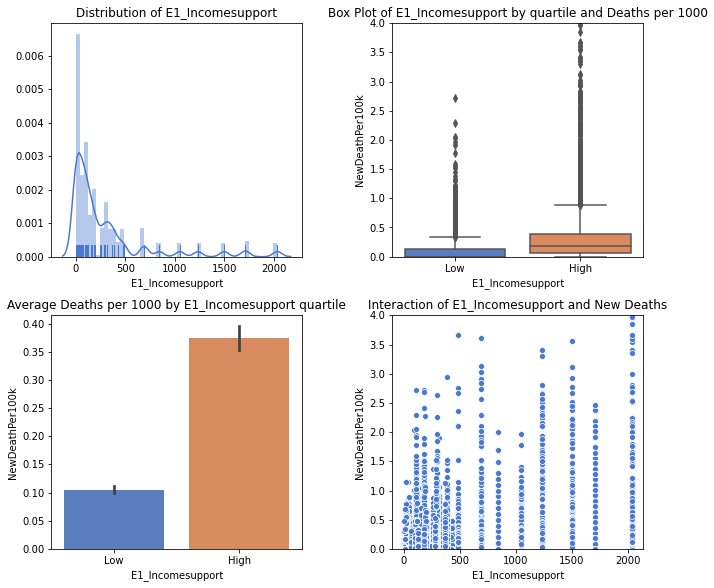

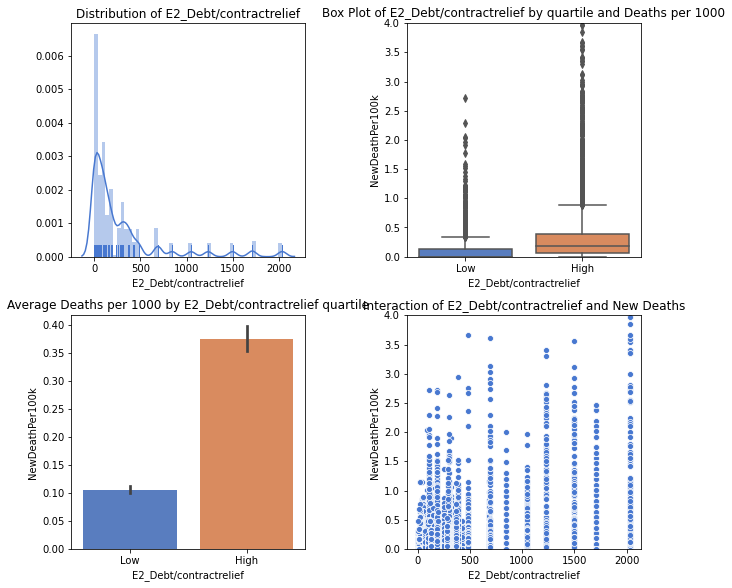

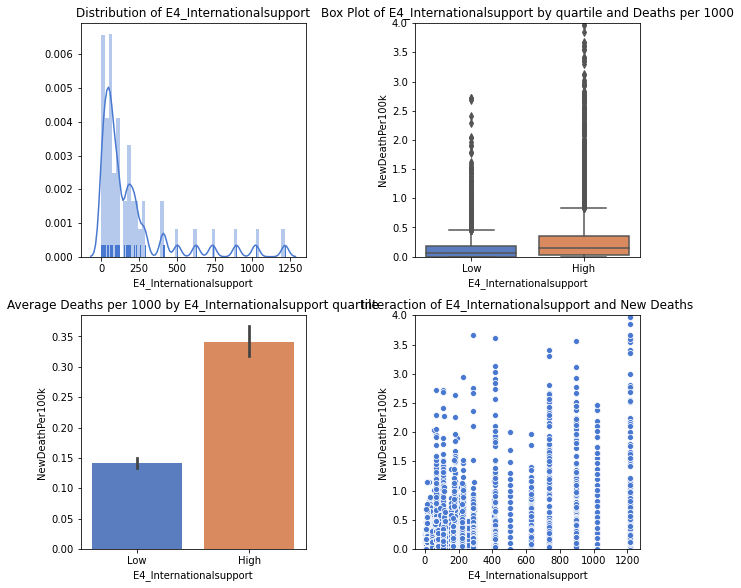

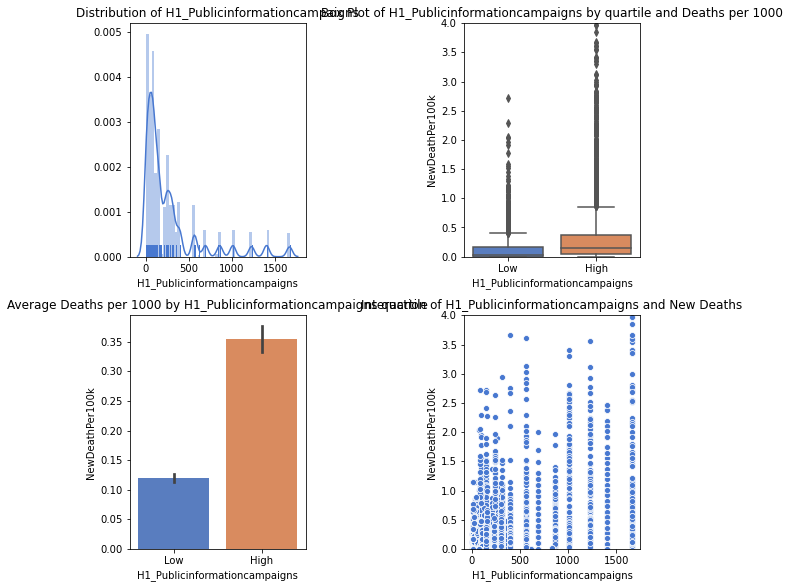

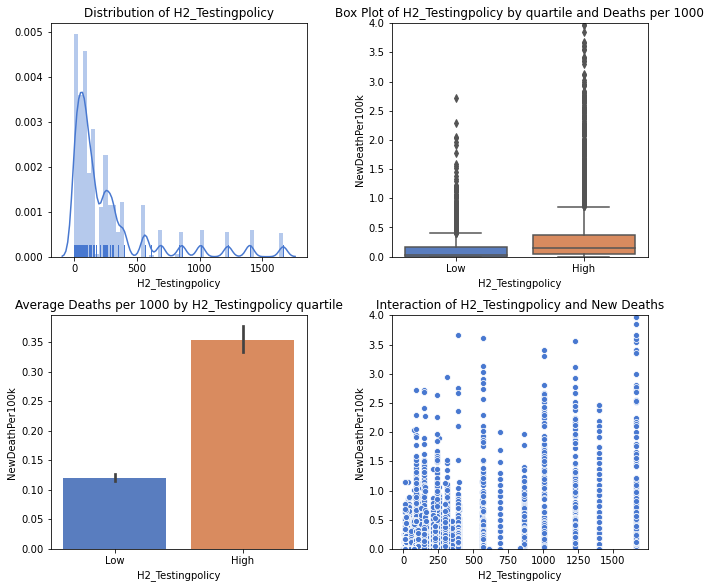

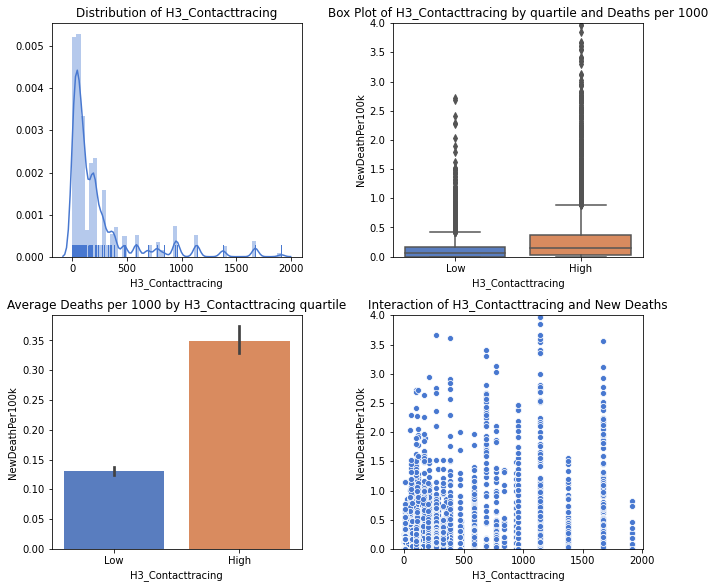

In [79]:
#pushing likertcolumn variables through for-loop for cross tabs and visuals
likertcolumns="C1_Schoolclosing","C2_Workplaceclosing","C3_Cancelpublicevents","C4_Restrictionsongatherings","C5_Closepublictransport","C7_Restrictionsoninternalmovement","C8_Internationaltravelcontrols","E1_Incomesupport","E2_Debt/contractrelief","E4_Internationalsupport","H1_Publicinformationcampaigns","H2_Testingpolicy","H3_Contacttracing"

#for i in list(likertcolumns):
    #data=df[i]
   # ct=pd.crosstab(data,df.DeathBin).apply(lambda r: r/len(df), axis=1)
    #display(ct),likertstatvisuals(i)

    #pushing quant variables through for-loop for cross tabs and visuals
bin_labels_5 = ['Low', 'High']
bin_edges=([0, .5,1])

for i in list(likertcolumns):
    data=df[i]
    ct=pd.crosstab(pd.qcut(data,
                              q=bin_edges,
                              labels=bin_labels_5,duplicates='drop'),df.DeathBin).apply(lambda r: r/len(df), axis=1)
    display(ct),quantstatvisuals(i)
    

DeathBin,Low,Medium,High
Asian,,,
Low,0.10898,0.07664,0.07519
Medium,0.13829,0.05771,0.04430
High,0.15709,0.05640,0.04627
Very High,0.09741,0.05771,0.08400


DeathBin,Low,Medium,High
Black,,,
Low,0.14460,0.05666,0.05863
Medium,0.13895,0.07375,0.04706
High,0.13409,0.05626,0.04969
Very High,0.08413,0.06179,0.09439


DeathBin,Low,Medium,High
Hispanic,,,
Low,0.10832,0.07243,0.08006
Medium,0.12857,0.06231,0.04956
High,0.17773,0.05311,0.02839
Very High,0.08716,0.06060,0.09176


DeathBin,Low,Medium,High
Native_American,,,
Low,0.08269,0.06717,0.11056
Medium,0.11371,0.06428,0.06244
High,0.14947,0.06402,0.04562
Very High,0.15591,0.05298,0.03116


DeathBin,Low,Medium,High
Pacific_Islander,,,
Low,0.08571,0.06389,0.11082
Medium,0.11016,0.06836,0.06179
High,0.13672,0.06625,0.05666
Very High,0.16919,0.04995,0.02051


DeathBin,Low,Medium,High
White,,,
Low,0.10464,0.06573,0.08979
Medium,0.13317,0.06205,0.06428
High,0.14789,0.06205,0.02984
Very High,0.11608,0.05863,0.06586


DeathBin,Low,Medium,High
Female,,,
Low,0.13711,0.07178,0.05022
Medium,0.18102,0.05613,0.02261
High,0.10267,0.06047,0.07769
Very High,0.08098,0.06008,0.09925


DeathBin,Low,Medium,High
MedianAge,,,
Low,0.17997,0.05153,0.02800
Medium,0.13119,0.06126,0.06783
High,0.11595,0.07362,0.05022
Very High,0.07467,0.06205,0.10372


DeathBin,Low,Medium,High
PopulationDensityMile2,,,
Low,0.17997,0.05153,0.02800
Medium,0.12909,0.06441,0.06652
High,0.11805,0.07046,0.05153
Very High,0.07467,0.06205,0.10372


DeathBin,Low,Medium,High
UnemploymentChangeMOM,,,
Low,0.11516,0.07598,0.05902
Medium,0.14145,0.06244,0.05469
High,0.12975,0.04588,0.06665
Very High,0.11542,0.06415,0.06941


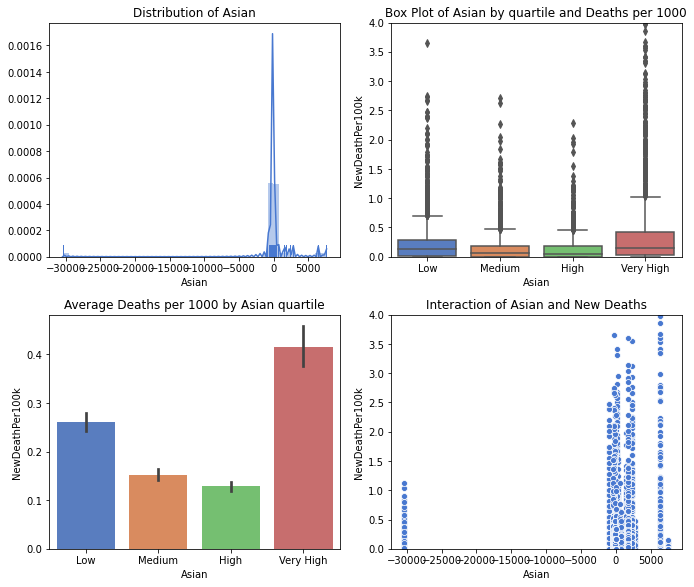

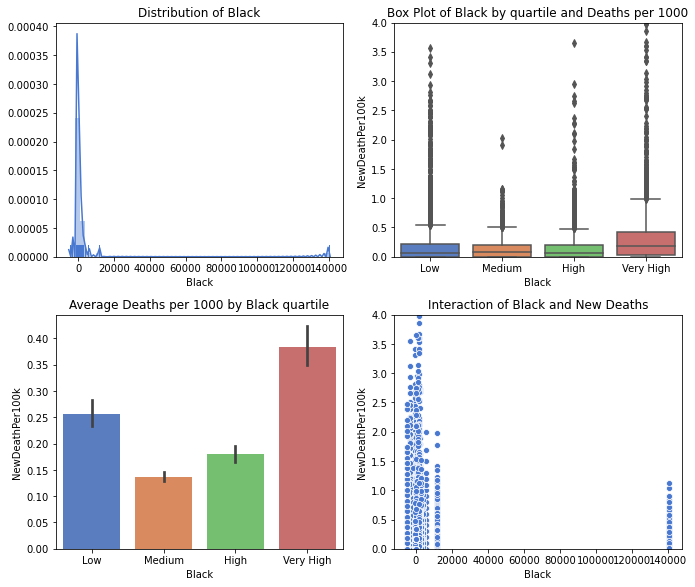

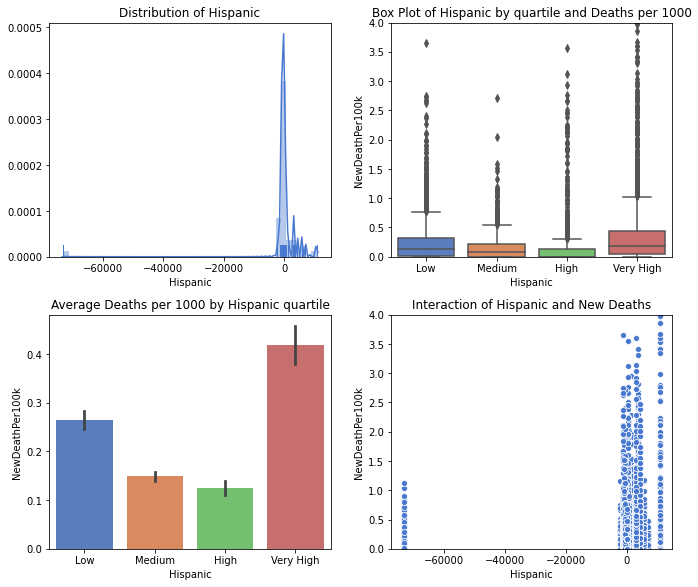

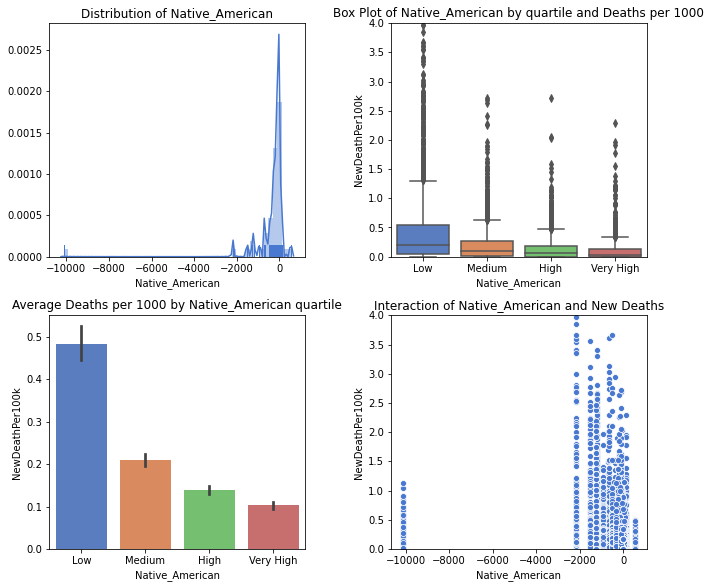

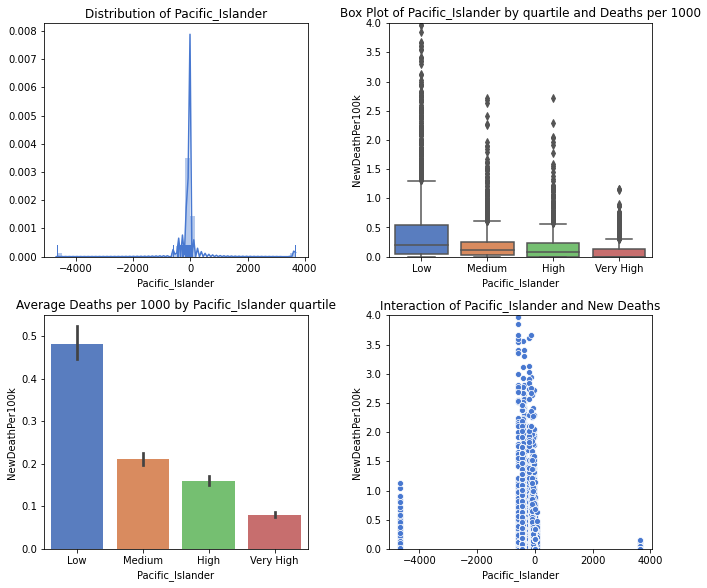

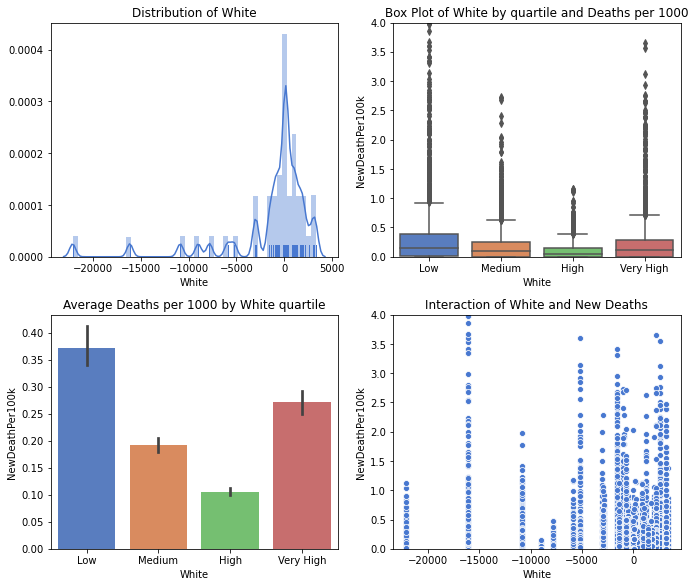

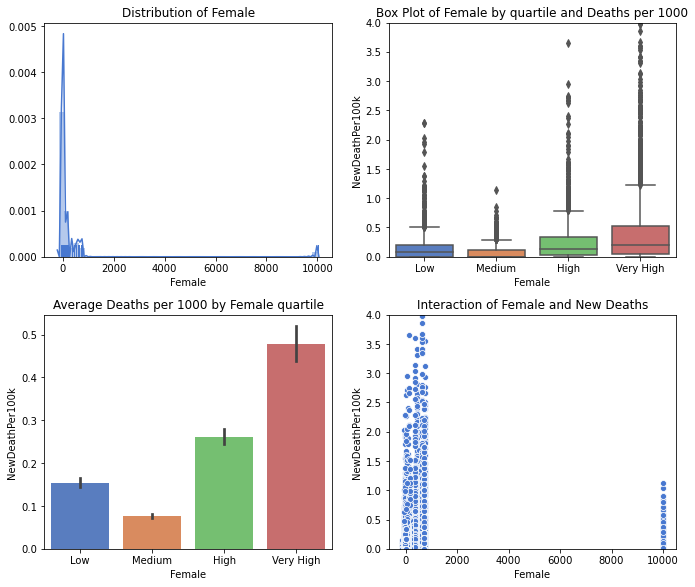

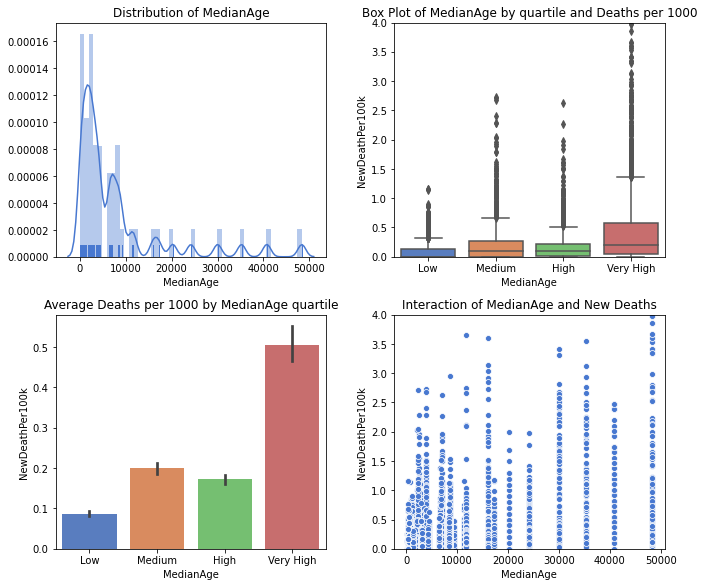

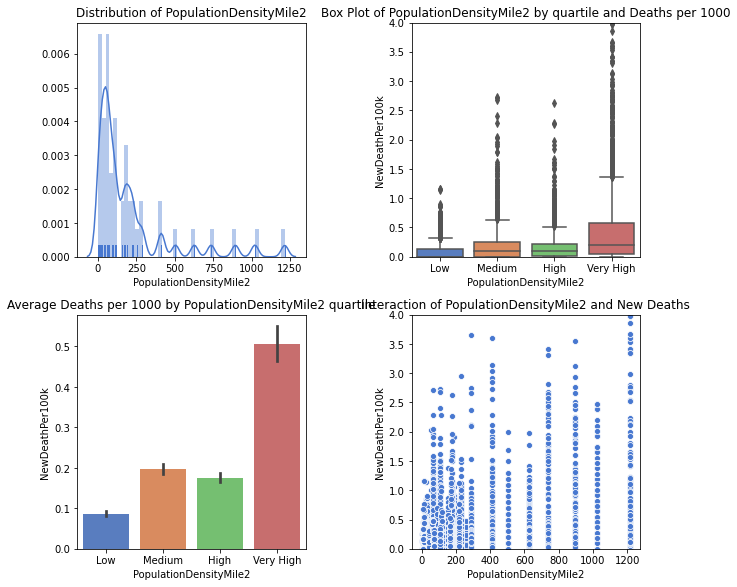

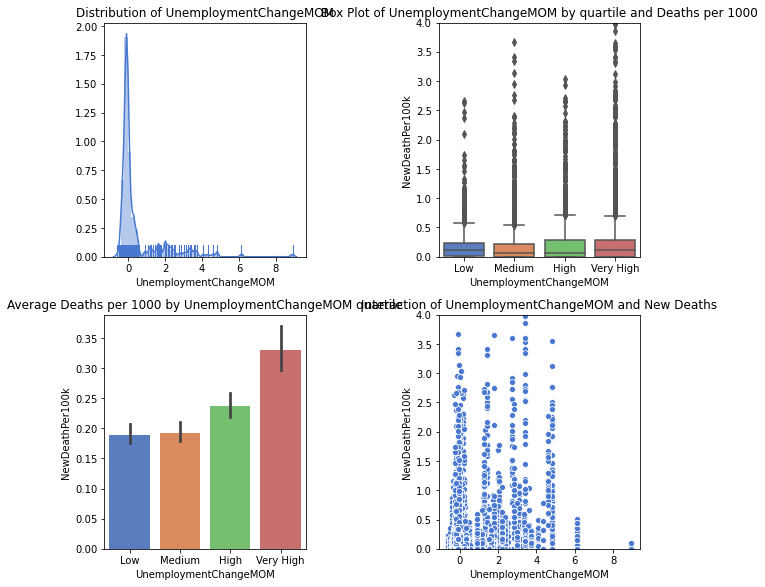

In [80]:
#pushing quant variables through for-loop for cross tabs and visuals
bin_labels_5 = ['Low', 'Medium', 'High', 'Very High']
bin_edges=([0, .25, .5, .75,1])
quantcolumns="Asian","Black","Hispanic","Native_American","Pacific_Islander","White","Female","MedianAge","PopulationDensityMile2","UnemploymentChangeMOM"
for i in list(quantcolumns):
    data=df[i]
    ct=pd.crosstab(pd.qcut(data,
                              q=bin_edges,
                              labels=bin_labels_5,duplicates='raise'),df.DeathBin).apply(lambda r: r/len(df), axis=1)
    display(ct),quantstatvisuals(i)

In [53]:
df.to_excel("df1.xlsx")

#pushing index variables through for-loop for cross tabs and visuals
indexcolumns="StringencyIndexForDisplay","GovernmentResponseIndexForDisplay","ContainmentHealthIndexForDisplay","EconomicSupportIndexForDisplay"
bin_labels_5 = ['Low', 'Medium', 'High', 'Very High']
bin_edges=([0, .25, .5, .75,1])

for i in list(indexcolumns):
    data=df[i]
    ct=pd.crosstab(pd.qcut(data,
                              q=bin_edges,
                              labels=bin_labels_5,duplicates='drop'),df.DeathBin).apply(lambda r: r/len(df), axis=1)
    display(ct),quantstatvisuals(i),lineartest(i)


In [54]:
##Getting Coefficients

X = df[["C1_Schoolclosing","C2_Workplaceclosing","C3_Cancelpublicevents","C4_Restrictionsongatherings","C5_Closepublictransport","C6_Stayathomerequirements","C7_Restrictionsoninternalmovement","C8_Internationaltravelcontrols","E1_Incomesupport","E2_Debt/contractrelief","E4_Internationalsupport","H1_Publicinformationcampaigns","H2_Testingpolicy","H3_Contacttracing","Asian","Black","Hispanic","Native_American","Pacific_Islander","Female","MedianAge","PopulationDensityMile2","UnemploymentChangeMOM"]] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['NewDeathPer100k']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


Intercept: 
 0.09555257467286984
Coefficients: 
 [ 1.03087125e-05  1.03087125e-05  4.99830700e-04  4.39584010e-05
  2.33302057e-04  1.24171708e-04  2.26728457e-04 -4.58542839e-04
  8.31314179e-05  8.31314179e-05  2.17378569e-03 -2.73202596e-04
 -2.73202596e-04 -1.59726031e-04 -8.72227842e-05 -2.00056879e-05
  1.79209303e-05 -5.75524439e-05  1.08466448e-04  1.42810819e-04
 -1.04792635e-04  2.17378569e-03  2.33990896e-02]


In [55]:
##Printing summary stats of regression model
#df['month']=pd.DatetimeIndex(df['Date']).month
#df2=df.query('new_death>0')

X = df[["C1_Schoolclosing","C2_Workplaceclosing","C3_Cancelpublicevents","C4_Restrictionsongatherings","C5_Closepublictransport","C6_Stayathomerequirements","C7_Restrictionsoninternalmovement","C8_Internationaltravelcontrols","E1_Incomesupport","E2_Debt/contractrelief","E4_Internationalsupport","H1_Publicinformationcampaigns","H2_Testingpolicy","H3_Contacttracing","Asian","Black","Hispanic","Native_American","Pacific_Islander","White","Female","MedianAge","PopulationDensityMile2","UnemploymentChangeMOM"]] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
y = df['NewDeathPer100k']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
model = est.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        NewDeathPer100k   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     135.9
Date:                Sat, 03 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:22:45   Log-Likelihood:                -4801.5
No. Observations:                7607   AIC:                             9645.
Df Residuals:                    7586   BIC:                             9791.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [57]:
pd.options.display.float_format = '{:.4f}'.format
coeff=pd.DataFrame(model.params.round(5))
coeff.to_excel('coeff.xlsx')
print(model.params.round(5))

const                                 0.0952
C1_Schoolclosing                      0.0000
C2_Workplaceclosing                   0.0000
C3_Cancelpublicevents                 0.0005
C4_Restrictionsongatherings           0.0001
C5_Closepublictransport               0.0002
C6_Stayathomerequirements             0.0001
C7_Restrictionsoninternalmovement     0.0002
C8_Internationaltravelcontrols       -0.0005
E1_Incomesupport                      0.0001
E2_Debt/contractrelief                0.0001
E4_Internationalsupport               0.0021
H1_Publicinformationcampaigns        -0.0003
H2_Testingpolicy                     -0.0003
H3_Contacttracing                    -0.0002
Asian                               218.2251
Black                               218.2252
Hispanic                            218.2252
Native_American                     218.2251
Pacific_Islander                    218.2253
White                               218.2252
Female                                0.0001
MedianAge 

In [58]:
regression = LinearRegression(normalize=True)
y = df['NewDeathPer100k']
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
allxvars=(["C1_Schoolclosing","C2_Workplaceclosing","C3_Cancelpublicevents","C4_Restrictionsongatherings","C5_Closepublictransport","C6_Stayathomerequirements","C7_Restrictionsoninternalmovement","C8_Internationaltravelcontrols","E1_Incomesupport","E2_Debt/contractrelief","E4_Internationalsupport","H1_Publicinformationcampaigns","H2_Testingpolicy","H3_Contacttracing","Asian","Black","Hispanic","Native_American","Pacific_Islander","White","Female","MedianAge","PopulationDensityMile2","UnemploymentChangeMOM"])
df1 = pd.DataFrame(df,columns=allxvars)
baseline = max(np.mean(cross_val_score(regression, df1, y, scoring='r2', cv=crossvalidation, n_jobs=1)),.1)##Baseline of 0.1
interactions = list()
for feature_A in df1[allxvars]:
    for feature_B in df1[allxvars]:
        if feature_A > feature_B:
            df1['interaction'] = df1[feature_A] * df1[feature_B]
            score = np.mean(cross_val_score(regression, df1, y, scoring='r2', cv=crossvalidation, n_jobs=1))
            if score > baseline:
                interactions.append((feature_A, feature_B, round(score,3)))
print ('Baseline R2: %.3f' % baseline)
print ('Top 10 interactions: %s' % sorted(interactions, key=lambda x:x[2], reverse=True)[:10])


Baseline R2: 0.292
Top 10 interactions: [('UnemploymentChangeMOM', 'C6_Stayathomerequirements', 0.316), ('UnemploymentChangeMOM', 'H3_Contacttracing', 0.308), ('UnemploymentChangeMOM', 'C3_Cancelpublicevents', 0.306), ('UnemploymentChangeMOM', 'C4_Restrictionsongatherings', 0.306), ('UnemploymentChangeMOM', 'C5_Closepublictransport', 0.305), ('UnemploymentChangeMOM', 'E1_Incomesupport', 0.305), ('UnemploymentChangeMOM', 'E2_Debt/contractrelief', 0.305), ('UnemploymentChangeMOM', 'E4_Internationalsupport', 0.305), ('UnemploymentChangeMOM', 'H1_Publicinformationcampaigns', 0.305), ('UnemploymentChangeMOM', 'H2_Testingpolicy', 0.305)]


In [59]:
####Removing Race from model
##Printing summary stats of regression model

X = df[["C1_Schoolclosing","C2_Workplaceclosing","C3_Cancelpublicevents","C4_Restrictionsongatherings","C5_Closepublictransport","C6_Stayathomerequirements","C7_Restrictionsoninternalmovement","C8_Internationaltravelcontrols","E1_Incomesupport","E2_Debt/contractrelief","E4_Internationalsupport","H1_Publicinformationcampaigns","H2_Testingpolicy","H3_Contacttracing","Female","MedianAge","PopulationDensityMile2","UnemploymentChangeMOM"]] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
y = df['NewDeathPer100k']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
model = est.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        NewDeathPer100k   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     181.8
Date:                Sat, 03 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:24:41   Log-Likelihood:                -4866.7
No. Observations:                7607   AIC:                             9763.
Df Residuals:                    7592   BIC:                             9867.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [60]:
df['ContainmentIndex']=df.apply(lambda x: (x["C1_Schoolclosing"]+x["C2_Workplaceclosing"]+x["C3_Cancelpublicevents"]+x["C4_Restrictionsongatherings"]+x["C5_Closepublictransport"]+x["C6_Stayathomerequirements"]+x["C7_Restrictionsoninternalmovement"]+x["C8_Internationaltravelcontrols"])//23*100, axis=1) 
df['EconomicIndex'] = df.apply(lambda x: (x['E1_Incomesupport'] + x['E2_Debt/contractrelief'])//4*10, axis=1)
df['HealthIndex']= df.apply(lambda x: (x["H1_Publicinformationcampaigns"]+x["H2_Testingpolicy"]+x["H3_Contacttracing"])//7*10, axis=1)


In [61]:
##Using Index from Oxford instead of individual factors
X = df[["EconomicIndex","ContainmentIndex","HealthIndex","Asian","Black","Hispanic","Native_American","Pacific_Islander","White","Female","MedianAge","PopulationDensityMile2","UnemploymentChangeMOM"]] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
y = df['NewDeathPer100k']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
model = est.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        NewDeathPer100k   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     172.2
Date:                Sat, 03 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:24:45   Log-Likelihood:                -4983.7
No. Observations:                7607   AIC:                             9995.
Df Residuals:                    7593   BIC:                         1.009e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [62]:
pd.options.display.float_format = '{:.4f}'.format
print(model.params.round(5))

const                       0.1106
EconomicIndex               0.0000
ContainmentIndex            0.0000
HealthIndex                -0.0001
Asian                    -732.8751
Black                    -732.8751
Hispanic                 -732.8751
Native_American          -732.8752
Pacific_Islander         -732.8752
White                    -732.8751
Female                      0.0001
MedianAge                  -0.0001
PopulationDensityMile2      0.0021
UnemploymentChangeMOM       0.0348
dtype: float64


In [63]:
pd.set_option('display.max_columns', None)

In [64]:
##sns pairplot testing colinearity
#sns.pairplot(df,vars=["EconomicIndex","ContainmentIndex","HealthIndex","Female","MedianAge","PopulationDensityMile2","UnemploymentChangeMOM"])


In [65]:
# Separating out the features
X=X = df[["C1_Schoolclosing","C2_Workplaceclosing","C3_Cancelpublicevents","C4_Restrictionsongatherings","C5_Closepublictransport","C6_Stayathomerequirements","C7_Restrictionsoninternalmovement","C8_Internationaltravelcontrols","E1_Incomesupport","E2_Debt/contractrelief","E4_Internationalsupport","H1_Publicinformationcampaigns","H2_Testingpolicy","H3_Contacttracing","Female","MedianAge","PopulationDensityMile2","UnemploymentChangeMOM"]] 
# Separating out the target
y = df['NewDeathPer100k']
# Standardizing the features
x = StandardScaler().fit_transform(X)

pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component1', 'principal_component2','principal_component3', 'principal_component4'])
                          

In [66]:
principalDf.head(20)

,principal_component1,principal_component2,principal_component3,principal_component4
0,-4224.9471,9759.7208,470.5926,48.6773
1,-4224.9471,9759.7208,470.5926,48.6773
2,-4224.9471,9759.7208,470.5926,48.6773
3,-4224.9471,9759.7208,470.5926,48.6773
4,-4224.9471,9759.7208,470.5926,48.6773
5,-4224.9471,9759.7208,470.5926,48.6773
6,-4224.9471,9759.7208,470.5926,48.6773
7,-4224.9471,9759.7208,470.5926,48.6773
8,-4224.9471,9759.7208,470.5926,48.6773
9,-4216.1666,9759.5100,455.1377,36.4274


In [67]:
finaldf =pd.DataFrame(pd.concat([principalDf, df[['NewDeathPer100k']]], axis = 1))

In [70]:
### seems it changed 0 to "nan" so below steps to swap nan to 0 and then remove excess rows at end of dataframe
finaldf['NewDeathPer100k']=finaldf['NewDeathPer100k'].fillna(0)
finaldf=finaldf.iloc[0:7607]
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7607 entries, 0 to 7606
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   principal_component1  7607 non-null   float64
 1   principal_component2  7607 non-null   float64
 2   principal_component3  7607 non-null   float64
 3   principal_component4  7607 non-null   float64
 4   NewDeathPer100k       7607 non-null   float64
dtypes: float64(5)
memory usage: 356.6 KB


In [71]:
Xpca=finaldf[['principal_component1', 'principal_component2','principal_component3', 'principal_component4']]
ypca=finaldf['NewDeathPer100k']


X2pca = sm.add_constant(Xpca)
est = sm.OLS(ypca, X2pca)
model = est.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        NewDeathPer100k   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     29.50
Date:                Sat, 03 Oct 2020   Prob (F-statistic):           2.19e-24
Time:                        17:31:15   Log-Likelihood:                -5637.1
No. Observations:                7607   AIC:                         1.128e+04
Df Residuals:                    7602   BIC:                         1.132e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1916 

In [72]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.97734552 0.01686909 0.00279414 0.00178541]


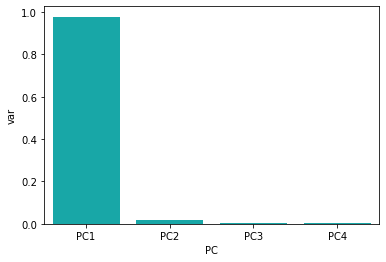

In [73]:
##This graph shows all variance is found within PC1 and only explains 2% variance as noted above.

dfx = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4']})
sns.barplot(x='PC',y="var", 
           data=dfx, color="c");

In [74]:
FinalData=pd.DataFrame(df[["C2_Workplaceclosing","C4_Restrictionsongatherings","C7_Restrictionsoninternalmovement","E1_Incomesupport","E2_Debt/contractrelief","E4_Internationalsupport","H1_Publicinformationcampaigns","H3_Contacttracing","PopulationDensityMile2","UnemploymentChangeMOM","C5_Closepublictransport","H2_Testingpolicy","NewDeathPer100k"]])
##Printing summary stats of regression model
#df['month']=pd.DatetimeIndex(df['Date']).month
#df2=df.query('month>1')
X = FinalData[["C2_Workplaceclosing","C4_Restrictionsongatherings","C7_Restrictionsoninternalmovement","E1_Incomesupport","E2_Debt/contractrelief","E4_Internationalsupport","H1_Publicinformationcampaigns","H3_Contacttracing","PopulationDensityMile2","UnemploymentChangeMOM","C5_Closepublictransport","H2_Testingpolicy"]]
y = FinalData['NewDeathPer100k']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
model = est.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        NewDeathPer100k   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     230.2
Date:                Sat, 03 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:31:33   Log-Likelihood:                -5049.3
No. Observations:                7607   AIC:                         1.012e+04
Df Residuals:                    7597   BIC:                         1.019e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [ ]:
pd.options.display.float_format = '{:.4f}'.format
print(model.params.round(5))

In [ ]:
coefficients=pd.DataFrame(model.params.round(5))
coefficients.to_excel('coeff.xlsx')

In [ ]:
FinalData.info()